# Analyzing borrowers’ risk of defaulting

This project is to help prepare a report for a bank’s loan division. We’ll find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Our report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

## Open the data file and have a look at the general information. 


Open the data on Credit Scoring and explore it. Read the file `credit_scoring_eng.csv` from the `/datasets/` folder and save it in the `credit_data` variable:

In [1]:
# Loading all the libraries
import pandas as pd

# Load the data
try: 
    credit_data = pd.read_csv('credit_scoring_eng.csv')
except:
    credit_data = pd.read_csv('/datasets/credit_scoring_eng.csv')

## Task 1. Data exploration

Let's explore our data, see how many columns and rows it has, look at a few rows to check for potential issues with the data.

In [2]:
# Let's see how many rows and columns our dataset has
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


The table contains 12 columns saved as the *int64*, *float 64* and *object* data types.

Column names are easy to read, so no need to change them. The number of column values are different, particularly in `days_employed` and `total_income`. There are missing values in these 2 columns. The number of missing values seems to be the even in those two columns, with 2174 values missing.

In [3]:
# let's print the first 10 rows
credit_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [4]:
# Print the last 10 rows
credit_data.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,secondary education,1,married,0,F,employee,1,17517.812,to become educated
21516,0,-914.391429,42,bachelor's degree,0,married,0,F,business,0,51649.244,purchase of my own house
21517,0,-404.679034,42,bachelor's degree,0,civil partnership,1,F,business,0,28489.529,buying my own car
21518,0,373995.710838,59,SECONDARY EDUCATION,1,married,0,F,retiree,0,24618.344,purchase of a car
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


In [5]:
# Print some more sample rows
credit_data.sample(2)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
214,2,-1321.079223,41,some college,2,married,0,F,employee,0,50327.519,purchase of the house for my family
6170,0,-3264.336897,46,secondary education,1,married,0,F,employee,0,13163.049,purchase of my own house


Some issues from the printed data sample:

 1. Negative values in the `days_employed` column
 2. Uppercase, lowercase variants in the `education` column.
 3. Rating scale in the `education_id` seems off. `primary education` has an identifier of `3`, `bachelor's degree` is `0` while the rest of the identifiers follow an increasing scale: *secondary education - identifier: 1* < *some college - identifier: 2* < *graduate degree - identifier: 4* . We'll have to change the values of `primary education` to `0` and `bachelor's degree` to `3` in the `education_id` column.
 4. Different variants in the `purpose` column referring to the same purpose. For example: `purchase of the house`, `housing transactions`, `purchase of the house for my family`, `purchase of my own house`, `property`, `buy commercial real estate`. They all refer to the same goal of taking a loan for buying houses/real estate. We will need to categorize those variants into unique bins later.

In [6]:
# Get info on data by a statistic summary
credit_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


From previously:
* We have missing values in `days_employed` and `total_income`

More findings:
* The minimum value of `children` is `-1`
* In `days_employed`, at least 75% of the data is negative. The minimum and maximum data points are respectively `-18388.95` and `401755.40`. It means the distribution of data in the column is really widespread. Something is off with the `days employed` data that we may need further investigation.
* The min of `dob_years` is `0`. It's not realistic for people having loan or credit records. Can be data entry errors or technical issues.

In [7]:
# First, check where the missing values located in the dataset
credit_data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

The missing values in `days_employed` look symmetrical to the missing values in `total_income`. 

1. To verify that, we'll create a filtered table (saved under the `missing_value_days` variable) with missing data form `days_employed`.
2. We'll create a second table called `missing_value_table` where we'll apply multiple conditions for filtering out missing values present in both `days_employed` and `income_type` columns.
3. Compare the two filtered table to see if they're some the same size.

In [8]:
# Let's look at the filtered table with missing values in days_employed
missing_value_days = credit_data.loc[credit_data['days_employed'].isna()]
missing_value_days

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [9]:
# Let's apply multiple conditions for filtering data with missing values 
missing_value_table = credit_data.loc[(credit_data['days_employed'].isna()) & ((credit_data['total_income'].isna()))]
missing_value_table

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**Intermediate conclusion**

The number of rows in the filtered missing value tables: `missing_value_days` and `missing_value_table` are of the same size: 2174 rows × 12 columns. The number of rows (2174 rows) also match the number of missing values. When a client has no monthly income, there's no employed days record for that client and vice versa.

Let's check the percentage of the missing values (2174 * 2 columns) compared to the whole dataset (21525 entries * 12 columns):

In [10]:
# Percentage of missing rows compared to the whole dataset
missing_value_percentage = (2174 * 2) / (21525 * 12)
percentage_value = "{:.0%}". format(missing_value_percentage)
percentage_value

'2%'

The missing values percentage account for 2% of the whole dataset's entries. Usually, the usual ratio 5-10% of leaving missing values is allowed. Before deciding to drop or keep the columns with missing values, we may need to look further.

We don't know yet why these clients don't have both their monthly income and employed days reported. Are they unemployed? Is it because of technical problems or data entry problems?

In [11]:
# Find the correlation between the missing data in days_employed, total_income and income_type
missing_value_table['income_type'].value_counts().sort_index(ascending=True)

business          508
civil servant     147
employee         1105
entrepreneur        1
retiree           413
Name: income_type, dtype: int64

In [12]:
# Find the correlation between the missing data in days_employed, total_income and dob_years
missing_value_table['dob_years'].value_counts().sort_index(ascending=True)

0     10
19     1
20     5
21    18
22    17
23    36
24    21
25    23
26    35
27    36
28    57
29    50
30    58
31    65
32    37
33    51
34    69
35    64
36    63
37    53
38    54
39    51
40    66
41    59
42    65
43    50
44    44
45    50
46    48
47    59
48    46
49    50
50    51
51    50
52    53
53    44
54    55
55    48
56    54
57    56
58    56
59    34
60    39
61    38
62    38
63    29
64    37
65    20
66    20
67    16
68     9
69     5
70     3
71     5
72     2
73     1
Name: dob_years, dtype: int64

*Note: there are 10 rows with the `0` value in the `dob_years` column*

In [13]:
# Find the correlation between the missing data in days_employed, total_income and education
missing_value_table['education'].value_counts()

secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
SOME COLLEGE              7
Some College              7
Primary Education         1
PRIMARY EDUCATION         1
Name: education, dtype: int64

In [14]:
# Find the correlation between the missing data in days_employed, total_income and family_status
missing_value_table['family_status'].value_counts()

married              1237
civil partnership     442
unmarried             288
divorced              112
widow / widower        95
Name: family_status, dtype: int64

In [15]:
# Find the correlation between the missing data in days_employed, total_income and gender
missing_value_table['gender'].value_counts()

F    1484
M     690
Name: gender, dtype: int64

In [16]:
# Find the correlation between the missing data in days_employed, total_income and children
missing_value_table['children'].value_counts().sort_index(ascending=True)

-1        3
 0     1439
 1      475
 2      204
 3       36
 4        7
 5        1
 20       9
Name: children, dtype: int64

*Note: There's `-1` value in the `children` column. `20` children is odd as well, as it appears 9 times.*

**Possible reasons for missing values in data**

Most of the missing value rows don't resemble any pattern by other columns.The values might be missing due to technical errors. They may have arisen when an analyst/ IT staff may have been accidentally cut out the data. Or they can even occur when data was initially being recorded without values in either the `days_employed` or `total_income` column. The data software could be set to a rule that set NaN to the other column if values in the other column was missing.

However, let's do some check-ups on the statistic distribution of the `missing_value_table` and the `credit_data` original dataset to see if we've missed anything:

In [17]:
# Check distribution of the missing_value_table
missing_value_table.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,2174.000000,0.0,2174.000000,2174.000000,2174.000000,2174.000000,0.0
mean,0.552438,NaN,43.632015,0.800828,0.975161,0.078197,NaN
std,1.469356,NaN,12.531481,0.530157,1.418220,0.268543,NaN
min,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,34.000000,0.250000,0.000000,0.000000,NaN
50%,0.000000,NaN,43.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,NaN,54.000000,1.000000,1.000000,0.000000,NaN
max,20.000000,NaN,73.000000,3.000000,4.000000,1.000000,NaN


In [18]:
# Check the distribution in the whole dataset
credit_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


**Intermediate conclusion**

Apart from main differences in missing values in `days_employed`, `total_income`; the distribution in the original dataset is quite similar to the distribution of the filtered table.

Another difference is the first quartile of `education_id` of the whole dataset has a larger range (1 vs 0.25) compared to the filtered table. It may mean that the mean value of the first 25% of missing values fall between `bachelor's degree` (current education id: 0) and `secondary education` (current education id: 1). That first quartile mean of the whole dataset falls on `secondary education` (current education id: 1). Clients with `bachelor's degree`, `secondary education` have more missing values than others, but we're not sure if they're just accidental.

However, we noted before that the current rating scale in `education_id` has some inconsistency. `primary education ` should take an identifier of `0`, `bachelor's degree` should be `3`.

**Data Exploration Conclusions**

At this point, we can conclude that missing values take place symmetrically in only two columns in the whole dataset: `days_employed` and `total_income`. We've investigated thoroughly the correlation between missing values and other columns. Nothing particular can be found.

Within `days_employed` and `total_income`, we will first determine if there are outliers within the current values in those two columns. After that, we'll fill in the missing values with either the mean or median of that column. Although missing values only account for 2% of the dataset, the percentage of missing row values is 10%. It is a significant amount of data rows to be left out, we'll fill in as much as we can.

Before transforming the data, we are addressing different types of data issues found so far:
* Missing values in `days_employed` and `total_income`. Direction is to fill in the missing values with the mean/median value.
* Incorrect artifacts in `children` column. The min number of children `-1.00` needs to be changed to the mean/median value of the column data. The `20` children with a significant frequency are the outliers, we may need to replace them with mean/median.
* Incorrect artifacts: `0` value in the `dob_years` column, to be changed to mean/median value of the column data.
* Incorrect artifacts: Negative values in the `days_employed` column. Possible outliers to be removed.
* Different & duplicated registers: Uppercase, lowercase variants in the `education` column to be changed to unique values.
* Adjust the rating scale in the `education_id`to match with the increasing scale of education. `primary education` to be changed to `0` value, `bachelor's degree` to be changed to `3`.
* Different registers in the `purpose` column referring to the same purpose. To be changed and regrouped to unique bins in another column.

## Data transformation

Let's go through each column to see what issues we may have in them.

**Step 1: Transform the `education` column with uppercase, lowercase problem**

In [19]:
# See all values in education column
credit_data['education'].value_counts().sort_index(ascending=True)

BACHELOR'S DEGREE        274
Bachelor's Degree        268
GRADUATE DEGREE            1
Graduate Degree            1
PRIMARY EDUCATION         17
Primary Education         15
SECONDARY EDUCATION      772
SOME COLLEGE              29
Secondary Education      711
Some College              47
bachelor's degree       4718
graduate degree            4
primary education        250
secondary education    13750
some college             668
Name: education, dtype: int64

In [20]:
# Fix uppercase, lowercase problems in the education column
credit_data['education'] = credit_data['education'].str.lower()

In [21]:
# Check all the values in the education column to make sure we fixed them
credit_data['education'].value_counts().sort_index()

bachelor's degree       5260
graduate degree            6
primary education        282
secondary education    15233
some college             744
Name: education, dtype: int64

**Step 2: Transform the `education_id` column, fix the educational identifier problem with `primary education` and `bachelor's degree`**

In [22]:
# See all values in education and education_id column to check if the identifier rating scale is problematic
credit_data.pivot_table(index=['education','education_id'], aggfunc='size').sort_index(level=['education_id','education'])

education            education_id
bachelor's degree    0                5260
secondary education  1               15233
some college         2                 744
primary education    3                 282
graduate degree      4                   6
dtype: int64

In [23]:
# Change the identifier of bachelor's degree and primary education in the education_id column
credit_data.loc[credit_data['education'] == "bachelor's degree", 'education_id'] = 3
credit_data.loc[credit_data['education'] == 'primary education', 'education_id'] = 0

In [24]:
# Check all the values in the education_id column to make sure we fixed them
credit_data.pivot_table(index=['education','education_id'], aggfunc='size').sort_index(level=['education_id','education'])

education            education_id
primary education    0                 282
secondary education  1               15233
some college         2                 744
bachelor's degree    3                5260
graduate degree      4                   6
dtype: int64

**Step 3: Transform the `children` column with `-1` and `20` children**

In [25]:
# See all values in the children column
credit_data['children'].value_counts().sort_index(ascending=True)

-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

<AxesSubplot:>

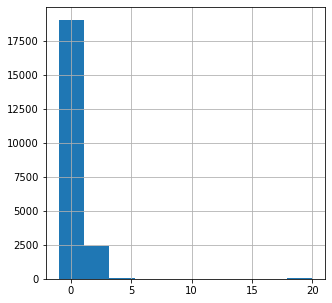

In [26]:
# Plot the children column to depict if there's any outlier
credit_data['children'].hist(figsize=(5, 5))

In [27]:
# Since there are outliers (20 children), we'll use the median to fill in the -1 children values
# Find the median of the children data that are not -1
children_median = credit_data.loc[credit_data['children'] != -1, 'children'].median()
int(children_median)

0

In [28]:
# Fix the -1 children values with the 0 as the median
credit_data.loc[credit_data['children'] == -1, 'children'] = 0

In [29]:
# Fix the outliers (20 children) as well with the median
credit_data.loc[credit_data['children'] == 20, 'children'] = 0

In [30]:
# Check the children column again to make sure it's all fixed
credit_data['children'].describe()

count    21525.000000
mean         0.470476
std          0.750534
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

**Step 4: Check the data in the `days_employed` column, investigate if any of more issues apart from missing values, negative values**

Recap of issues:

* Missing values in days_employed, we'll need to fill in the missing values with a mean/median.
* Negative values in the `days_employed` column. Possible outliers to be removed.

In [31]:
# See the distribution of values in the days_employed column
credit_data['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

More findings from the `days_employed` column's statistics:

* At the third interquartile, negative values still exist. It means at least 75% of the data in this column is negative. Although it's not realistic to have negative days, we can't just invalidate and drop the negative data.
* The mean value of `days_employed` is `63046.50` which is more than 172 years of employment! The max value of `days_employed` is `401755.40`, or 1100 years. 

There seems to be greater problems with the data than what we had in mind. Let's explore further the data by plotting.

<AxesSubplot:>

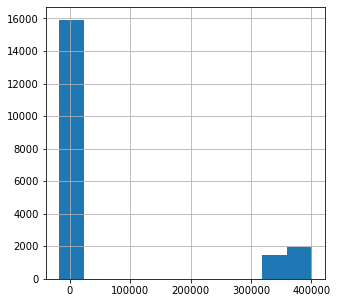

In [32]:
# Plot the days_employed column to investigate data distribution, outliers:
credit_data['days_employed'].hist(figsize=(5, 5))

The plotting of `days_employed` helps us discover the obvious outliers (taking less than 25% of the data). The standard deviation is way too high (140827.31) which indicates that the values are spread out over a really large range. The part of the data between the 300,000 days point and above the max point (401755.40 days) is problematic. It's equal to a range of 821 years to 1200 years of being employed. That's just impossible! 

The data must have been messed up here due to some technical issues, most probably during the ETL (extract, transform, load) process. The real data might have been multiplied multiple times. We should remove these outliers and fill them with `NaN` temporarily. Removing them will reduce the mean of the data to a statistically sound value.

The data in this column will look a lot better in terms of distribution. There might be, again, techical errors in the ways this dataset is transformed during the ETL process. All the values are now negative - sharing the same pattern. We just need to find a way to correct the negative values, before being able to fill in the missing values.

Let's try something. If we use the absolute values for the data, they actually make sense. For example, the mean would be 2353 days (6.44 years) of employment. The old min value would be now the max value (18388 days or 50.3 years). The same way, the new min value is now 0.66 years).

In [33]:
# Remove the outliers values in the days_employed column with 'NaN'
credit_data.loc[(credit_data['days_employed'] > 300000) & (credit_data['days_employed'] < 402000),'days_employed'] = float('nan')

In [34]:
# Check the distribution of values in the days_employed column after removing the outliers
credit_data['days_employed'].describe()

count    15906.000000
mean     -2353.015932
std       2304.243851
min     -18388.949901
25%      -3157.480084
50%      -1630.019381
75%       -756.371964
max        -24.141633
Name: days_employed, dtype: float64

Now, the data in this column look a lot better in terms of distribution. There might be, again, techical errors in the ways this dataset is transformed during the ETL process. All the values are now negative - sharing the same pattern. We just need to find a way to correct the negative values, before being able to fill in the missing values.

If we try to divide the statistic values above by `-1`, they actually make sense. For example, the mean would be 2353 days (6.44 years) of employment. The old min value would be now the max value (18388 days or 50.3 years). The same way, the new min value is now 0.66 years). Let's correct the `days_employed` data by dividing them by `-1`.

In [35]:
# Return the absolute values of days_employed
credit_data['days_employed'] = (credit_data['days_employed']).abs()
credit_data['days_employed'].describe()

count    15906.000000
mean      2353.015932
std       2304.243851
min         24.141633
25%        756.371964
50%       1630.019381
75%       3157.480084
max      18388.949901
Name: days_employed, dtype: float64

In [36]:
# Check the result - make sure the data issues in the days_employed column are fixed
credit_data['days_employed']

0        8437.673028
1        4024.803754
2        5623.422610
3        4124.747207
4                NaN
            ...     
21520    4529.316663
21521            NaN
21522    2113.346888
21523    3112.481705
21524    1984.507589
Name: days_employed, Length: 21525, dtype: float64

There are no more technical errors in this column apart from missing values.

In [37]:
# Since there's no more outlier, let's use the mean to fill in missing values in the days_employed column
credit_data['days_employed'].fillna(credit_data['days_employed'].mean(), inplace=True)
# Make sure no missing values is left in the days_employed column
credit_data['days_employed'].isna().sum()

0

In [38]:
# Change the data type of days_employed from float to integer
credit_data['days_employed'].astype(int)

0        8437
1        4024
2        5623
3        4124
4        2353
         ... 
21520    4529
21521    2353
21522    2113
21523    3112
21524    1984
Name: days_employed, Length: 21525, dtype: int32

**Step 5: Transform the client's age in the `dob_years` column, fix the `0` year-old value**

In [39]:
# See the statistics in dob_years to catch the 0 value again
credit_data['dob_years'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [40]:
# Replace these 0 age rows with the mean value in the dob_years column
credit_data.loc[credit_data['dob_years'] == 0, 'dob_years'] = int(credit_data['dob_years'].mean())

In [41]:
# Check to see if the 0 values are all fixed
credit_data['dob_years'].value_counts().sort_index(ascending=True)

19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    614
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

**Step 6: Transform data in `family_status` column. See what kind of values there are and what problems may need to be addressed**

In [42]:
# See the values for the family_status column
credit_data['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [43]:
# We may want to change 'widow / widower' to widowed to avoid confusion
credit_data.loc[credit_data['family_status'] == 'widow / widower', 'family_status'] = 'widowed'

In [44]:
# Check the result - make sure it's fixed
credit_data['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widowed                960
Name: family_status, dtype: int64

**Step 6: Transform data in `gender`. See what kind of values there are and what problems may need to be addressed**

In [45]:
# See the values in the gender column
credit_data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [46]:
# The ‘XNA’ value is unclear, we'll need to change it to 'unknown'
# ‘XNA’ in the above output might be because of the third gender or incorrect information while data entry
credit_data.loc[credit_data['gender'] == 'XNA', 'gender'] = 'unknown'

In [47]:
# Check the result - make sure it's fixed
credit_data['gender'].value_counts()

F          14236
M           7288
unknown        1
Name: gender, dtype: int64

**Step 6: Transform the `income_type` column. See what kind of values there are and what problems may need to be addressed**

In [48]:
# See the values in the income_type column
credit_data['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [49]:
# 'paternity / maternity leave' may cause confusion with the / letter, let's change to 'parental leave'
credit_data.loc[credit_data['income_type'] == 'paternity / maternity leave', 'income_type'] = 'parental leave'

In [50]:
# Check the result - make sure it's fixed
credit_data['income_type'].value_counts()

employee          11119
business           5085
retiree            3856
civil servant      1459
unemployed            2
entrepreneur          2
parental leave        1
student               1
Name: income_type, dtype: int64

**Step 7: Transform data in the `total_income` column, fill in missing values**

In [51]:
# See the distribution of values in total_income
credit_data['total_income'].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

<AxesSubplot:>

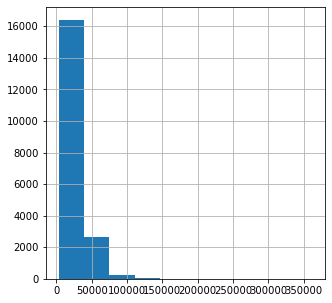

In [52]:
# Plot the total_income column to investigate data distribution, outliers:
credit_data['total_income'].hist(figsize=(5, 5))

The distribution of `total_income` looks good, no outliers found so far. We'll fill in the missing data here with the mean of the column.

In [53]:
# Fill in missing values of the total_income column with the mean
credit_data['total_income'].fillna(credit_data['total_income'].mean(), inplace=True)
# Make sure no missing values is left in the total_income column
credit_data['total_income'].isna().sum()

0

In [54]:
# Convert total_income data type from float to integer
credit_data['total_income'] = credit_data['total_income'].astype(int)

In [55]:
# Check the result - make sure the data issues in the total_income column are fixed
credit_data['total_income']

0        40620
1        17932
2        23341
3        42820
4        25378
         ...  
21520    35966
21521    24959
21522    14347
21523    39054
21524    13127
Name: total_income, Length: 21525, dtype: int32

**Step 8: Transform the `purpose` column, group the purposes into a new `purpose_category` column**

In [56]:
# See the values for the purpose column
credit_data['purpose'].value_counts().sort_index(ascending=True)

building a property                         620
building a real estate                      626
buy commercial real estate                  664
buy real estate                             624
buy residential real estate                 607
buying a second-hand car                    479
buying my own car                           505
buying property for renting out             653
car                                         495
car purchase                                462
cars                                        478
construction of own property                635
education                                   447
getting an education                        443
getting higher education                    426
going to university                         496
having a wedding                            777
housing                                     647
housing renovation                          612
housing transactions                        653
profile education                       

In [57]:
# Create the conditions with phrases in common to group values into 4 groups in the purpose column
real_estate_p = ['property', 'real estate', 'housing', 'house']
car_p = ['car', 'cars']
wedding_p = pd.Series(['wedding'])
education_p = pd.Series(['education', 'educated', 'university'])

# Change the duplicated values with 4 groups of purposes: real estate, car, wedding, education
# Record the 4 groups of purposes into a new purpose_category column in credit_data 
for keyword in real_estate_p:
    credit_data.loc[credit_data['purpose'].str.contains(keyword, na=False, regex=False), 'purpose_category'] = 'real estate'
for keyword in car_p:
    credit_data.loc[credit_data['purpose'].str.contains(keyword, na=False, regex=False), 'purpose_category'] = 'car'
for keyword in wedding_p:
    credit_data.loc[credit_data['purpose'].str.contains(keyword, na=False, regex=False), 'purpose_category'] = 'wedding'
for keyword in education_p:
    credit_data.loc[credit_data['purpose'].str.contains(keyword, na=False, regex=False), 'purpose_category'] = 'education'

# Check again the new purpose_category unique values
credit_data['purpose_category'].unique()

array(['real estate', 'car', 'education', 'wedding'], dtype=object)

**Step 9: Check if we have any duplicates in our data, and drop them if any. As we've cleaned most of the data, there will be some duplications that we could not see before and that's ok to drop.**

In [58]:
# Check duplicates if any
credit_data.duplicated().sum()

71

In [59]:
# Drop the duplicates and reset the index
credit_data = credit_data.drop_duplicates().reset_index(drop=True)

In [60]:
# Last check whether we have any duplicates
credit_data.duplicated().sum()

0

In [61]:
# Check the size of the dataset that you now have after your first manipulations with it

credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  int32  
 11  purpose           21454 non-null  object 
 12  purpose_category  21454 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(6)
memory usage: 2.0+ MB


**What we've changed in the dataset during this data transformation process:**
* Fix uppercase, lowercase problems in the `education` column
* Change the identifier of `bachelor's degree` and `primary education` from 1 to 3 and vice versa in the `education_id` column
* Fix the -1 `children` values and the outliers of 20 children with the median
* Remove the outliers values with > 300,000 days in the `days_employed` column with 'NaN', fill in missing values with the mean and then return absolute values for the column
* Replace these 0 age rows with the mean value in the `dob_years` column
* Asthetic changes to avoid confusion. Includes: changing 'widow / widower' to 'widowed' in the `family_status` column, changing ‘XNA’ to 'unknown' in the `gender` column, changing 'paternity / maternity leave' to 'parental leave' in the `income_type` column
* Fill in missing values of the `total_income` column with the mean
* Group the purposes in the purposes into a new `purpose_category` column with 4 categories: real estate, car, wedding, education

First, the hypothesis questions we need to find answers for are:
* Question 1: Is there a connection between having kids and repaying a loan on time?
* Question 2: Is there a connection between having marital and repaying a loan on time?
* Question 3: Is there a connection between income level and repaying a loan on time?
* Question 4: How do different loan purposes affect on time loan repayment?

Previous to answering those questions, let's analyze first what it means by 'repaying a loan on time'?

Let's review our data documentation:

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- **`debt` - was there any debt on loan repayment**
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

There's an identifier whether any debt on loan repayment exist, in the `debt` column! Values in `debt` is categorical with 0 as 'no' and 1 as 'yes'. The credit risk & financial term for prolonged missed payments, or not repaying on time, is known as the ***default rate***. The task is now as easy as checking the connection between the `debt` column and a few others, such as: `children`, `family_status`, `total_income`, `purpose_category`.

**Categorizing `debt` into a new `debt_default` column - Categorical data**

In [62]:
# Check unique values in the debt column again. Are they consisting of only 1 and 0?
credit_data['debt'].unique()

array([0, 1], dtype=int64)

In [63]:
# Since there are only two value options, let's do it the easy way
# Create a new debt_default column dupplicated from debt column
credit_data['debt_default'] = credit_data['debt']
# Change values in the debt_default column to make it clearer, whether client has been defaulted (1) or not(0)
credit_data.loc[credit_data['debt_default'] == 0 ,'debt_default'] = 'not defaulted'
credit_data.loc[credit_data['debt_default'] == 1 ,'debt_default'] = 'defaulted'
# Count the unique values of the new debt_defaut columns
# We'll use this debt_default column to crosscheck with other columns to test our hypothesis
credit_data['debt_default'].value_counts()

not defaulted    19713
defaulted         1741
Name: debt_default, dtype: int64

**Categorizing `children` into a new `having_kids` column - From numerical data to categorical**

In [64]:
# Check the unique values of the children column
credit_data['children'].value_counts().sort_index(ascending=True)

0    14214
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

In [65]:
# This is more difficult, we'll need to use function
# Create a function returns according to the number of 'children' value, using the following rules:
    # —'no kids', with children = 0
    # —'have kids', with children # 0
    # — if error, the funtion will print 'Check the assign_kid_status function'

def assign_kids_status(children):
    try:
        if children == 0:
            return 'no kids'
        return 'have kids'
    except:
        print('Check the assign_kids_status function')
        
# Test the assign_kids_status function
assign_kids_status(20)

'have kids'

In [66]:
# Apply the assign_kid_status function to a new column have_kids
credit_data['have_kids'] = credit_data['children'].apply(assign_kids_status)
# Check unique values of the new have_kids column
credit_data['have_kids'].unique()

array(['have kids', 'no kids'], dtype=object)

**Check if we need to categorize `family_status` - Categorical data**

In [67]:
# See the unique values and their counts in family_status
credit_data['family_status'].value_counts()

married              12339
civil partnership     4151
unmarried             2810
divorced              1195
widowed                959
Name: family_status, dtype: int64

Data are pretty clear, we will leave the values as is.

**Check if we need to categorize `purpose_category` - Categorical data**

In [68]:
# We use purpose_category instead of purpose because we already grouped the original purposes into unique bins
# See the unique values and their counts in purpose_category
credit_data['purpose_category'].value_counts()

real estate    10811
car             4306
education       4013
wedding         2324
Name: purpose_category, dtype: int64

Again, we incorporated this step previously in the data transformation part.

**Finally, categorizing `total_income` into a new `income_level` column - From numerical data to categorical**

In [69]:
# See statistics of the values in total_income in 2 decimals
credit_data['total_income'].describe().round(2)

count     21454.00
mean      26787.06
std       15647.10
min        3306.00
25%       17219.50
50%       24966.50
75%       31330.00
max      362496.00
Name: total_income, dtype: float64

The average monthly income of a client, the mean value, in this dataset is around 26787. Even at the fourth interquartile, total income is only at 31330 per month. The min and max incomes are also very far from the distribution.

Let's group in the  monthly income into those income levels:
* `low income`: any income less than or equal to 25000
* `middle income`: income that is greater than 25000 and less than or equal to 30000
* `middle high income`: income that is greater than 30000 but lower than 70000
* `high income`: any income that is equal to or higher than 70000

In [70]:
# We'll need to use function in this case
# Create a function returns according to the number of 'income' value, using the following rules:
    # —'low income': any income less than or equal to 25000
    # —'middle income': income that is greater than 25000 and less than or equal to 30000
    # —'middle high income': income that is greater than 30000 but lower than 70000
    # —'high income': any income that is equal to or higher than 70000
    # — if error, the funtion will print 'Check the assign_income_level function'

def assign_income_level(income):
    try:
        if income <= 25000:
            return 'low income'
        elif (income > 25000) & (income <= 30000):
            return 'middle income'
        elif (income > 30000) & (income <= 70000):
            return 'middle high income'
        return 'high income'
    except:
        print('Check the assign_income_level function')
        
# Test the assign_income_level function at different levels to make sure of a functioning function
print(assign_income_level(10000))
print(assign_income_level(28000))
print(assign_income_level(50000))
print(assign_income_level(100000))

low income
middle income
middle high income
high income


In [71]:
# Apply the assign_income_level function to a new column income_level
credit_data['income_level'] = credit_data['total_income'].apply(assign_income_level)
# Check unique values of the new income_level column
credit_data['income_level'].unique()

array(['middle high income', 'low income', 'middle income', 'high income'],
      dtype=object)

There we go, we have categorized the variables need in neat columns to faciliate our hypothesis testing. The columns which have been categorized so far are: `debt` compared to `children`, `family_status`, `total_income`, `purpose_category`.

In [72]:
# A final view of the preprocessed data before answering our hypothesis questions
# It should be good to be analyzed now!
credit_data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,debt_default,have_kids,income_level
0,1,8437.673028,42,bachelor's degree,3,married,0,F,employee,0,40620,purchase of the house,real estate,not defaulted,have kids,middle high income
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932,car purchase,car,not defaulted,have kids,low income
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,real estate,not defaulted,no kids,low income
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,education,not defaulted,have kids,middle high income
4,0,2353.015932,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,wedding,not defaulted,no kids,middle income


## Checking the Hypotheses


**Question 1: Is there a correlation between having children and paying back on time?**

In [73]:
# Extract a kids_default_log dataframe with two columns: have_kids and debt_default
kids_default_log = credit_data[['have_kids','debt_default']]
# Create a pivot table based on the status of having kids or not, and having a defaulted debt or not
kids_default_table = kids_default_log.pivot_table(index=['debt_default'], columns=['have_kids'], aggfunc=len, margins=True).reset_index()
# Check the kids_default_table pivot table
kids_default_table

have_kids,debt_default,have kids,no kids,All
0,defaulted,669,1072,1741
1,not defaulted,6571,13142,19713
2,All,7240,14214,21454


In [74]:
# Calculate default-rate of clients who have kids, based on the kids_default_table pivot table
default_rate_kids = kids_default_table.loc[0, 'have kids'] / kids_default_table.loc[0, 'All']
print("Default rate of clients with kids: {:.0%}". format(default_rate_kids))

# Calculate default-rate of clients who don't have kids, based on the kids_default_table pivot table
default_rate_no_kids = kids_default_table.loc[0, 'no kids'] / kids_default_table.loc[0, 'All']
print("Default rate of clients without kids: {:.0%}". format(default_rate_no_kids))

Default rate of clients with kids: 38%
Default rate of clients without kids: 62%


**Conclusion**

We can take away the pattern from our data manipulations and observations from past client records that clients without kids exhibit a higher default rate (61%) - meaning they repay their loans later than exptected. On the other side, clients with kids have a lesser default rate of 39%. Perhaps, having kid(s) make the parents more alerted and more responsible with their finance as well as loan payment.

**Question 2: Is there a correlation between family status and paying back on time?**

In [75]:
# Extract a family_default_log dataframe with two columns: family_status and debt_default
family_default_log = credit_data[['family_status','debt_default']]
# Create a pivot table based on the types of family/marital status, and having a defaulted debt or not
family_default_table = family_default_log.pivot_table(index=['debt_default'], columns=['family_status'], aggfunc=len, margins=True).reset_index()
# Check the kids_default_table pivot table
family_default_table

family_status,debt_default,civil partnership,divorced,married,unmarried,widowed,All
0,defaulted,388,85,931,274,63,1741
1,not defaulted,3763,1110,11408,2536,896,19713
2,All,4151,1195,12339,2810,959,21454


In [76]:
# Calculate default-rate of unmarried clients, based on the family_default_table pivot table
default_rate_family_unmarried = family_default_table.loc[0, 'unmarried'] / family_default_table.loc[0, 'All']
print("Default rate of unmarried clients: {:.0%}". format(default_rate_family_unmarried))

# Calculate default-rate of married clients, based on the family_default_table pivot table
default_rate_family_married = family_default_table.loc[0, 'married'] / family_default_table.loc[0, 'All']
print("Default rate of married clients: {:.0%}". format(default_rate_family_married))

# Calculate default-rate of clients in civil partnership, based on the family_default_table pivot table
default_rate_family_civil = family_default_table.loc[0, 'civil partnership'] / family_default_table.loc[0, 'All']
print("Default rate of clients in civil partnership: {:.0%}". format(default_rate_family_civil))

# Calculate default-rate of divorced clients, based on the family_default_table pivot table
default_rate_family_divorced = family_default_table.loc[0, 'divorced'] / family_default_table.loc[0, 'All']
print("Default rate of divorced clients: {:.0%}". format(default_rate_family_divorced))

# Calculate default-rate of widowed clients, based on the family_default_table pivot table
default_rate_family_widowed = family_default_table.loc[0, 'widowed'] / family_default_table.loc[0, 'All']
print("Default rate of widowed clients: {:.0%}". format(default_rate_family_widowed))

Default rate of unmarried clients: 16%
Default rate of married clients: 53%
Default rate of clients in civil partnership: 22%
Default rate of divorced clients: 5%
Default rate of widowed clients: 4%


**Conclusion**

From our past records, it seems like married clients and those in civil partnership tend to have the highest and near highest rate of paying a loan lately, at repsectively 53% and 22%. Third place to that is unmarried clients. Maybe divorced and widowed customers are more attentive to repaying a loan on time because they have more time for themselves? It sounds like another exciting topic to explore on!

**Question 3: Is there a correlation between income level and paying back on time?**

In [77]:
# Extract a income_default_log dataframe with two columns: income_level and debt_default
income_default_log = credit_data[['income_level','debt_default']]
# Create a pivot table based on the types of income levels, and having a defaulted debt or not
income_default_table = income_default_log.pivot_table(index=['debt_default'], columns=['income_level'], aggfunc=len, margins=True).reset_index()
# Check the income_default_table pivot table
income_default_table

income_level,debt_default,high income,low income,middle high income,middle income,All
0,defaulted,22,896,414,409,1741
1,not defaulted,356,9854,5127,4376,19713
2,All,378,10750,5541,4785,21454


In [78]:
# Calculate default-rate of low-income clients, based on the income_default_table pivot table
default_rate_income_low = income_default_table.loc[0, 'low income'] / income_default_table.loc[0, 'All']
print("Default rate of low-income clients: {:.0%}". format(default_rate_income_low))

# Calculate default-rate of middle-income clients, based on the income_default_table pivot table
default_rate_income_middle = income_default_table.loc[0, 'middle income'] / income_default_table.loc[0, 'All']
print("Default rate of middle-income clients: {:.0%}". format(default_rate_income_middle))

# Calculate default-rate of middle-high-income clients, based on the income_default_table pivot table
default_rate_income_mhigh = income_default_table.loc[0, 'middle high income'] / income_default_table.loc[0, 'All']
print("Default rate of middle-high-income clients: {:.0%}". format(default_rate_income_mhigh))

# Calculate default-rate of high income clients, based on the income_default_table pivot table
default_rate_income_high = income_default_table.loc[0, 'high income'] / income_default_table.loc[0, 'All']
print("Default rate of high-income clients: {:.0%}". format(default_rate_income_high))

Default rate of low-income clients: 51%
Default rate of middle-income clients: 23%
Default rate of middle-high-income clients: 24%
Default rate of high-income clients: 1%


**Conclusion**

Low income clients leads in repaying a loan late with 51%, and the pattern becomes clearer when default rates decrease with higher income on the scale. Meanwhile, high income clients tend to have the least ratio of paying late. Indeed, we can tell high income customers who ask for a loan pay their loans on time from our past data.

**Question 4: How does credit purpose affect the default rate?**

In [79]:
# Extract a purpose_default_log dataframe with two columns: purpose_category and debt_default
purpose_default_log = credit_data[['purpose_category','debt_default']]
# Create a pivot table based on the types of purpose categories, and having a defaulted debt or not
purpose_default_table = purpose_default_log.pivot_table(index=['debt_default'], columns=['purpose_category'], aggfunc=len, margins=True).reset_index()
# Check the purpose_default_table pivot table
purpose_default_table

purpose_category,debt_default,car,education,real estate,wedding,All
0,defaulted,403,370,782,186,1741
1,not defaulted,3903,3643,10029,2138,19713
2,All,4306,4013,10811,2324,21454


In [80]:
# Calculate default-rate of clients with car loans, based on the purpose_default_table pivot table
default_rate_purpose_car = purpose_default_table.loc[0, 'car'] / purpose_default_table.loc[0, 'All']
print("Default rate of clients with car loans: {:.0%}". format(default_rate_purpose_car))

# Calculate default-rate of clients with educational loans, based on the purpose_default_table pivot table
default_rate_purpose_ed = purpose_default_table.loc[0, 'education'] / purpose_default_table.loc[0, 'All']
print("Default rate of clients with educational loans: {:.0%}". format(default_rate_purpose_ed))

# Calculate default-rate of clients with real estate loans, based on the income_default_table pivot table
default_rate_purpose_est = purpose_default_table.loc[0, 'real estate'] / purpose_default_table.loc[0, 'All']
print("Default rate of clients with real estate loans: {:.0%}". format(default_rate_purpose_est))

# Calculate default-rate of clients with wedding loans, based on the income_default_table pivot table
default_rate_purpose_wed = purpose_default_table.loc[0, 'wedding'] / purpose_default_table.loc[0, 'All']
print("Default rate of clients with wedding loans: {:.0%}". format(default_rate_purpose_wed))

Default rate of clients with car loans: 23%
Default rate of clients with educational loans: 21%
Default rate of clients with real estate loans: 45%
Default rate of clients with wedding loans: 11%


**Conclusion**

Clients who ask for a real estate related (house buying, construction i.e) loan seem to have the latest repayments at 45% of the overall client base. Compared to a short-term loan need (such as wedding, education or cars) where payment is usually expected to be more on-time, lending to clients with real estate purposes show a prolonged repayment. It is understandable given the liquidity and long process of real estate transactions.

# General Conclusion 

Overall, our responses to the hypotheses are as follows:
* ***There a connection between having kids and repaying a loan on time:*** Among the past client records, 61% is without kids pay much later than they should be.
* ***There a connection between having marital and repaying a loan on time:*** Married clients, those in civil partnership have the highest and near highest rate of paying a loan late (repsectively 53% and 22%). The more "single" a client is, in terms of marital status, he/she will most probably pay sooner.
* ***There a connection between income level and repaying a loan on time:*** Low income clients make up for 51% of the debt-defaulted client base. The more high income a client have, the less percentage of repaying late he/she gets.
* ***Different loan purposes affect on time loan repayment:*** Real estate related (house buying, construction i.e) loans results in the biggest repayment portion, at 45% of the overall data. Taking a loan for weddings has the least default rate, while other purposes are moderate at around a 21-23% default rate.